<a href="https://colab.research.google.com/github/DishaAndre/Health-and-Fitness-Data-Analysis/blob/main/DMW_MiniProject_Health_and_Fitness_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder

# Load dataset
import os

file_path = "health_fitness_dataset.csv"

if os.path.exists(file_path):
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!\n")
    print("Shape of dataset:", df.shape)
else:
    raise FileNotFoundError(
        "Dataset not found. Please place 'health_fitness_dataset.csv' in the project directory."
    )

print("Dataset loaded successfully! \n")
print("Shape of dataset:", df.shape)
print("\n")
df.head()


Dataset loaded successfully! 

Shape of dataset: (16000, 15)




,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,fitness_level
0,58,F,160.4,99.2,Swimming,67,Medium,15.5,113,8.6,1,8754,1.6,23.7,11.93
1,34,F,173.8,95.4,Weight Training,100,High,22.2,155,6.5,6,6134,1.9,18.2,12.18
2,50,F,159.8,89.3,Running,104,Medium,30.2,131,8.0,6,13286,2.4,23.9,8.49
3,57,F,165.4,112.2,Cycling,110,Medium,34.9,125,6.9,4,7619,3.5,22.5,15.31
4,41,M,169.1,67.5,Cycling,115,Medium,21.9,135,7.1,8,11028,3.2,22.0,1.42


Remove Duplicates

In [ ]:
# Check duplicates
print("Number of duplicate rows:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Number of duplicate rows: 0
Shape after removing duplicates: (16000, 15)


Handle Missing Values

In [ ]:
# Check missing values
print("Missing values before handling:\n", df.isnull().sum())

# Fill numeric columns with mean
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("\nMissing values after handling:\n", df.isnull().sum())


Missing values before handling:
 age                 0
gender              0
height_cm           0
weight_kg           0
activity_type       0
duration_minutes    0
intensity           0
calories_burned     0
avg_heart_rate      0
hours_sleep         0
stress_level        0
daily_steps         0
hydration_level     0
bmi                 0
fitness_level       0
dtype: int64

Missing values after handling:
 age                 0
gender              0
height_cm           0
weight_kg           0
activity_type       0
duration_minutes    0
intensity           0
calories_burned     0
avg_heart_rate      0
hours_sleep         0
stress_level        0
daily_steps         0
hydration_level     0
bmi                 0
fitness_level       0
dtype: int64


Normalize the Data (Min-Max Normalization)

In [ ]:
# Normalize numeric columns
normalized_df = df.copy()
for col in num_cols:
    normalized_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())

print("Data normalized using Min-Max Normalization")
normalized_df.head()


Data normalized using Min-Max Normalization


,age,gender,height_cm,weight_kg,activity_type,duration_minutes,intensity,calories_burned,avg_heart_rate,hours_sleep,stress_level,daily_steps,hydration_level,bmi,fitness_level
0,0.869565,F,0.287850,0.422083,Swimming,0.47,Medium,0.182973,0.258929,0.766667,0.000000,0.494192,0.05,0.386179,0.563387
1,0.347826,F,0.538318,0.392326,Weight Training,0.80,High,0.268107,0.633929,0.416667,0.555556,0.311957,0.20,0.162602,0.575213
2,0.695652,F,0.276636,0.344558,Running,0.84,Medium,0.369759,0.419643,0.666667,0.555556,0.809418,0.45,0.394309,0.400662
3,0.847826,F,0.381308,0.523884,Cycling,0.90,Medium,0.429479,0.366071,0.483333,0.333333,0.415247,1.00,0.337398,0.723273
4,0.500000,M,0.450467,0.173845,Cycling,0.95,Medium,0.264295,0.455357,0.516667,0.777778,0.652361,0.85,0.317073,0.066225


Apply Scalers

In [ ]:
print("Scaling data using different scaling techniques.\n")

minmax = MinMaxScaler()
robust = RobustScaler()
standard = StandardScaler()

# Min-Max Scaling (range 0–1)
minmax_scaled = df.copy()
minmax_scaled[num_cols] = minmax.fit_transform(df[num_cols])
print("Data scaled using Min-Max Scaler.\n")

# Robust Scaling (handles outliers)
robust_scaled = df.copy()
robust_scaled[num_cols] = robust.fit_transform(df[num_cols])
print("Data scaled using Robust Scaler.\n")

# Standard Scaling (mean=0, std=1)
standard_scaled = df.copy()
standard_scaled[num_cols] = standard.fit_transform(df[num_cols])
print("Data scaled using Standard Scaler.\n")

Scaling data using different scaling techniques.

Data scaled using Min-Max Scaler.

Data scaled using Robust Scaler.

Data scaled using Standard Scaler.



Measures of Central Tendency and Dispersion

In [ ]:
# Mean, Median, Mode
print("Measures of Central Tendency:\n")
print("Mean:\n", df[num_cols].mean())
print("\nMedian:\n", df[num_cols].median())
print("\nMode:\n", df[num_cols].mode().iloc[0])

# Dispersion: Variance and Standard Deviation
print("Measures of Dispersion:")
print("\nVariance:\n", df[num_cols].var())
print("\nStandard Deviation:\n", df[num_cols].std())

print("\nData Preprocessing Completed Successfully!")

Measures of Central Tendency:

Mean:
 age                   41.709812
height_cm            168.581050
weight_kg             95.053750
duration_minutes      70.001688
calories_burned       15.401481
avg_heart_rate       131.486000
hours_sleep            7.050919
stress_level           5.250063
daily_steps         8604.386688
hydration_level        2.497113
bmi                   22.735506
fitness_level          9.566661
dtype: float64

Median:
 age                   42.00
height_cm            168.00
weight_kg             94.70
duration_minutes      70.00
calories_burned       13.10
avg_heart_rate       130.00
hours_sleep            7.00
stress_level           5.00
daily_steps         8583.50
hydration_level        2.50
bmi                   22.50
fitness_level          9.58
dtype: float64

Mode:
 age                   24.0
height_cm            163.1
weight_kg             94.8
duration_minutes      52.0
calories_burned        7.5
avg_heart_rate       124.0
hours_sleep            6.9
stres

In [ ]:
#KNN Classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Encode categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['activity_type'] = le.fit_transform(df['activity_type'])
df['intensity'] = le.fit_transform(df['intensity'])

# Create simple target: categorize fitness level
df['fitness_category'] = pd.cut(df['fitness_level'],
                                bins=[0, 6, 12, df['fitness_level'].max()],
                                labels=['Low', 'Medium', 'High'])

# Select features and target
X = df[['age', 'weight_kg', 'hours_sleep', 'daily_steps', 'bmi']]
y = df['fitness_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.776875


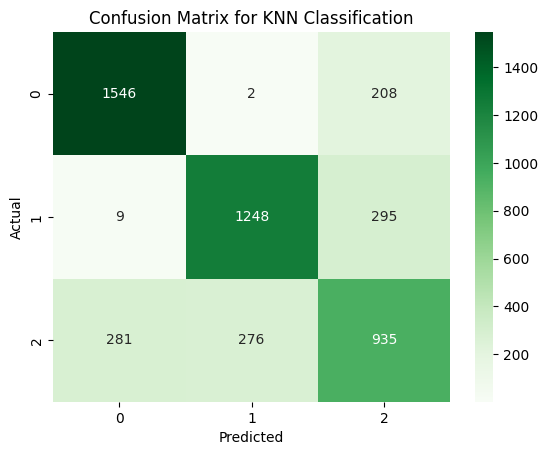

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix for KNN Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()